1. Свободный рост популяции: <br>
$\frac{dN}{dt} = rN$
2. Ограниченный рост популяции в виде уравнения Бернулли:<br>
$\frac{dN}{dt} = rN(1 - \frac{N}{k})$<br>
где $k = \frac{r}{b}$
3. Рост популяции совместно с ограничивающим ресурсом:<br>
$\begin{equation*}
 \begin{cases}
   \frac{dN}{dt} = rN(1 - \frac{N}{kF}),
   \\
   \frac{dF}{dt} = C - bN.
 \end{cases}
\end{equation*}$<br>
где параметр $C$ определяет скорость роста ресурса, а $b$ – скорость потребления ресурса членами популяции

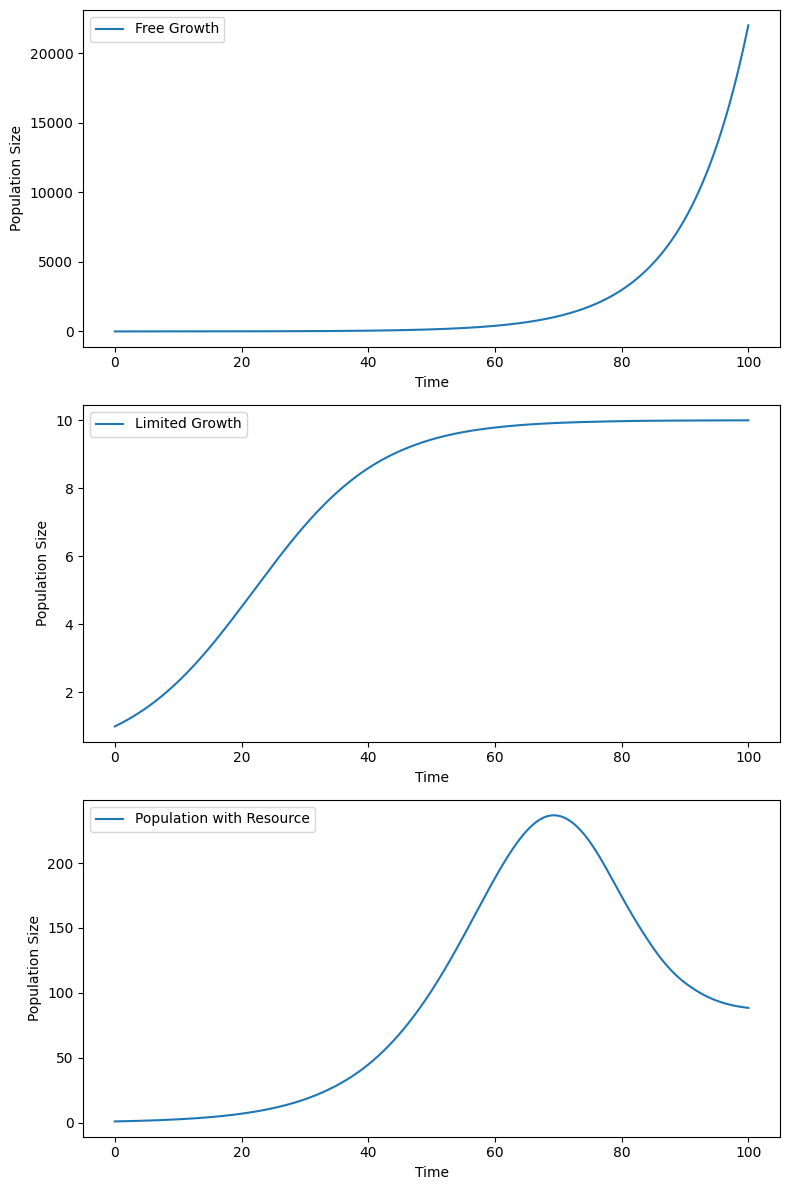

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Параметры модели
r = 0.1  # относительный темп прироста популяции
b = 0.01  # коэффициент ограничения роста популяции
k = r/b  # максимальная вместимость окружающей среды
C = 1.0  # скорость роста ресурса

# Функции правых частей дифференциальных уравнений для каждой модели
def free_growth(t, N):
    return r * N

def limited_growth(t, N):
    return r * N * (1 - N / k)

def population_with_resource(t, y):
    N, F = y
    dNdt = r * N * (1 - N / (k * F))
    dFdt = C - b * N
    return [dNdt, dFdt]

# Временные интервалы для решения уравнений
t_span = (0, 100)
t_eval = np.linspace(0, 100, 1000)

# Начальные условия для каждой модели
N0 = 1
F0 = 1

# Решение уравнений и построение графиков
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Свободный рост популяции
sol_free_growth = solve_ivp(free_growth, t_span, [N0], t_eval=t_eval)
axs[0].plot(sol_free_growth.t, sol_free_growth.y[0], label='Free Growth')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Population Size')
axs[0].legend()

# Ограниченный рост популяции
sol_limited_growth = solve_ivp(limited_growth, t_span, [N0], t_eval=t_eval)
axs[1].plot(sol_limited_growth.t, sol_limited_growth.y[0], label='Limited Growth')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Population Size')
axs[1].legend()

# Рост популяции с ограничивающим ресурсом
sol_population_with_resource = solve_ivp(population_with_resource, t_span, [N0, F0], t_eval=t_eval)
axs[2].plot(sol_population_with_resource.t, sol_population_with_resource.y[0], label='Population with Resource')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Population Size')
axs[2].legend()

plt.tight_layout()
plt.show()

Вывод: Из проведенного анализа моделей роста популяции можно сделать вывод, что различные факторы, такие как наличие ограничений на рост и доступность ресурсов, оказывают существенное влияние на динамику изменения численности популяции.